In [1]:
import pandas as pd
import numpy as np


from io import StringIO
import requests

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo



import re

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/investments_VC.csv",encoding = 'unicode_escape')

In [5]:
df= data.copy()

In [6]:
df.shape

(54294, 39)

In [7]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

## **Problems**

1-null values in all col

2-name col is full of nan

3-in total funding col nan value is represented by '-'

4-no need of seperate round col

5-category_list col values are not in appropriate manner

6-date cpl has null value and incorrect data type

7-round a to round g too many 0 values and incorrect data tpye

8-no need of founded_month col

9-founded_quarter col must carry the quarter number

In [9]:
df=df.dropna(how='any', subset=['name'])

In [10]:
df['category_list'].replace(to_replace = r"\W",value=',',regex= True,inplace= True)

In [11]:
df['category_list'].replace(to_replace = r'^,',value='',regex= True,inplace= True)
df['category_list'].replace(to_replace = r'E,Commerce',value='E-Commerce',regex= True,inplace= True)

In [12]:
df = pd.melt(df,id_vars=['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding'],var_name = 'gen_funding_round',value_name='funding_amount')

In [13]:
df = pd.melt(df,id_vars=['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'gen_funding_round','funding_amount'],var_name = 'invest_round_type',value_name='amount_given')

In [14]:
df=df[df['funding_amount']!=0.0]

df=df[df['amount_given']!=0.0]

In [15]:
df.shape

(26600, 22)

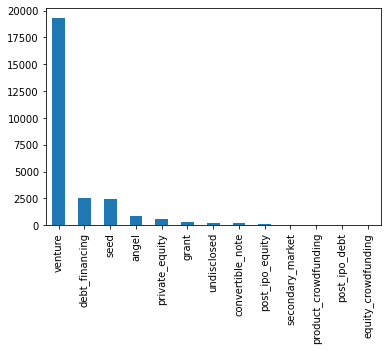

In [16]:
df['invest_round_type'].value_counts().plot(kind='bar')

## vanture capitalist invested in most of the startups

In [17]:
df['status'].value_counts()

operating    20963
acquired      4096
closed        1105
Name: status, dtype: int64

## closed startup is less so startup have created employement

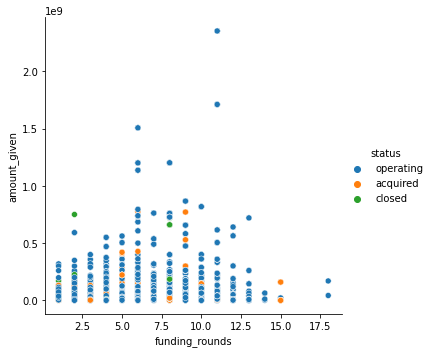

In [18]:
sns.relplot(x='funding_rounds',y='amount_given',hue='status',data=df)

possibility of closing down is high if funding is not managed.

Once survived to get funded, makes easy to get funding from investers.

and after geting more than 7 time of funding the startup dosen't colse down at all but may a possibility of getting acquired (selling of the company) is there.

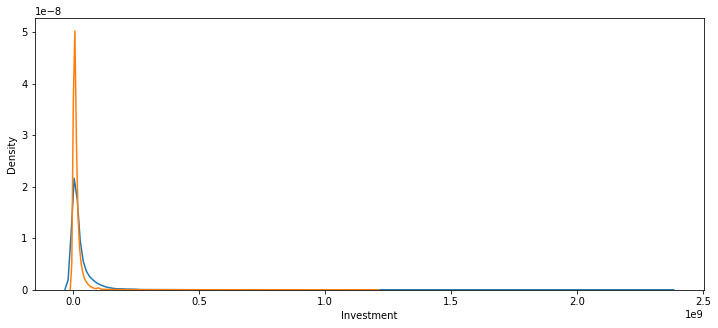

In [20]:
plt.subplots(figsize=(12,5))
sns.distplot(df['amount_given'],hist=False,label='Specialized Investment')
sns.distplot(df['funding_amount'],hist=False,label='General Round Funding')
plt.xlabel('Investment')
plt.show()

## Specialized Investment like venturi, seed, equity are more effictivly provides funding to the startups over General Investment round

In [21]:
x=df[' market '].value_counts().reset_index()
trace = go.Bar(x=x['index'],y=x[' market '])
data=[trace]
layout = go.Layout(title = 'Startup Markets',xaxis={'title':'Market_Zone'},yaxis={'title':'Count'})
fig = go.Figure(data=data,layout=layout)
pyo.iplot(fig)

## World Wide successful startup markets

In [22]:
df[df['founded_year'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
816,/organization/actacell,Actacell,http://www.actacell.com,"Search,Batteries,Clean,Technology,",Clean Technology,"98,00,000",acquired,USA,TX,Austin,...,NaN,NaN,NaN,NaN,2008-07-22,2010-12-29,round_A,5800000.0,seed,1000000.0
1685,/organization/airway-therapeutics,Airway Therapeutics,http://www.airwaytherapeutics.com,"Biotechnology,",Biotechnology,"51,00,000",operating,USA,OH,Cincinnati,...,NaN,NaN,NaN,NaN,2011-06-06,2014-09-10,round_A,4600000.0,seed,500000.0
2239,/organization/american-hometown-media,American Hometown Media,http://www.americanhometownmedia.com,NaN,NaN,"55,19,437",operating,USA,TN,Nashville,...,NaN,NaN,NaN,NaN,2011-12-09,2013-03-01,round_A,1655701.0,seed,3863736.0
3808,/organization/auspherix,Auspherix,NaN,"Health,Care,",Health Care,"18,55,753",operating,NOR,NaN,Aust-Agder,...,NaN,NaN,NaN,NaN,2013-12-03,2014-10-23,round_A,877127.0,seed,978626.0
4137,/organization/ayalogic,Ayalogic,http://imvox.com,"Chat,Audio,VoIP,Games,",VoIP,"10,71,500",closed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2004-10-31,2010-11-15,round_A,296500.0,seed,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718538,/organization/cyclacel-pharmaceuticals,Cyclacel Pharmaceuticals,http://cyclacel.com,"Biotechnology,",Biotechnology,"13,21,88,186",operating,USA,NJ,Newark,...,NaN,NaN,NaN,NaN,1999-05-01,2014-04-10,round_D,38769109.0,post_ipo_equity,10000000.0
3787389,/organization/omeros,Omeros,http://www.omeros.com,"Health,Care,Biotechnology,",Health Care,"13,28,00,000",operating,USA,WA,Seattle,...,NaN,NaN,NaN,NaN,2007-02-12,2014-03-20,round_E,63000000.0,post_ipo_equity,37800000.0
4182885,/organization/omeros,Omeros,http://www.omeros.com,"Health,Care,Biotechnology,",Health Care,"13,28,00,000",operating,USA,WA,Seattle,...,NaN,NaN,NaN,NaN,2007-02-12,2014-03-20,round_E,63000000.0,post_ipo_debt,32000000.0
4762187,/organization/fuel3d,Fuel3D,http://www.fuel-3d.com,"3D,3D,Technology,Hardware,,,Software,",3D Technology,"91,40,352",operating,USA,NC,"Greenville, North Carolina",...,NaN,NaN,NaN,NaN,2013-09-04,2014-11-04,round_A,8815352.0,product_crowdfunding,325000.0


In [23]:
df.drop(columns=['founded_at','founded_month'],inplace=True)

In [24]:
df.fillna(0)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,"Education,",Education,"44,00,000",operating,GBR,0,London,London,2.0,2013-Q1,2013.0,2013-01-01,2014-10-09,round_A,4000000.0,seed,400000.0
20,/organization/1000memories,1000memories,http://1000memories.com,"Curated,Web,",Curated Web,"25,35,000",acquired,USA,CA,SF Bay Area,San Francisco,2.0,2010-Q3,2010.0,2010-01-01,2011-02-16,round_A,2520000.0,seed,15000.0
22,/organization/1001-menus,1001 Menus,http://1001menus.com,"Local,Businesses,Restaurants,",Restaurants,"40,59,079",operating,FRA,0,Paris,Paris,4.0,2010-Q4,2010.0,2012-12-15,2013-11-13,round_A,3536910.0,seed,522169.0
150,/organization/2houses,2houses,http://www.2houses.com,"Curated,Web,",Curated Web,"9,66,728",operating,BEL,0,Brussels,Bel,2.0,2011-Q2,2011.0,2011-08-08,2012-11-09,round_A,860102.0,seed,106626.0
160,/organization/2u,2U,http://2U.com,"Software,Education,",Software,"9,58,75,000",operating,USA,MD,Baltimore,Hanover,6.0,2008-Q1,2008.0,2009-03-25,2013-10-21,round_A,10000000.0,seed,2275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789262,/organization/tile,Tile,http://thetileapp.com,"Mobile,",Mobile,"1,58,00,000",operating,USA,CA,SF Bay Area,San Mateo,4.0,2012-Q4,2012.0,2013-02-20,2014-10-01,round_A,9500000.0,product_crowdfunding,2600000.0
4790746,/organization/ubiome,uBiome,http://ubiome.com,"Quantified,Self,Big,Data,Machine,Learning,Heal...",Health Care,"49,71,193",operating,USA,CA,SF Bay Area,San Francisco,3.0,2013-Q1,2013.0,2012-11-16,2014-08-18,round_A,4500000.0,product_crowdfunding,351193.0
4793788,/organization/play-i,Wonder Workshop (Formerly Play-i),http://makewonder.com,"Hardware,,,Software,",Hardware + Software,"1,04,40,000",operating,USA,CA,SF Bay Area,San Mateo,3.0,2012-Q4,2012.0,2013-05-01,2014-03-04,round_A,8000000.0,product_crowdfunding,1440000.0
4825382,/organization/oculus-vr,Oculus VR,http://www.oculusvr.com,"Video,Games,Virtualization,Hardware,,,Software,",Video Games,"9,34,00,000",acquired,USA,CA,Anaheim,Irvine,3.0,2012-Q3,2012.0,2012-08-01,2013-12-12,round_B,75000000.0,product_crowdfunding,2400000.0


In [25]:
df['founded_year']=pd.to_datetime(df['founded_year'])

In [26]:
try:
    df['first_funding_at']=pd.to_datetime(df['first_funding_at'])
except:
    pass

In [27]:
df['last_funding_at']=pd.to_datetime(df['last_funding_at'])

In [28]:
df['amount_given']=df['amount_given'].astype(int)

In [29]:
df['funding_amount']=df['funding_amount'].astype(int)

In [30]:
dft=df[df['name'].duplicated()]

In [31]:
dft.shape

(13852, 20)

In [32]:
dft.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
49597,/organization/2u,2U,http://2U.com,"Software,Education,",Software,"9,58,75,000",operating,USA,MD,Baltimore,Hanover,6.0,2008-Q1,1970-01-01 00:00:00.000002008,2009-03-25,2013-10-21,round_B,20000000,seed,2275000
49609,/organization/33across,33Across,http://www.33across.com,"Social,Network,Media,Advertising,",Advertising,"2,56,54,560",operating,USA,NY,New York City,New York,5.0,2007-Q3,1970-01-01 00:00:00.000002007,2009-02-06,2012-07-19,round_B,9000000,seed,750000
49710,/organization/42floors,42Floors,http://42floors.com,"Commercial,Real,Estate,Real,Estate,",Commercial Real Estate,"1,74,00,000",operating,USA,CA,SF Bay Area,San Francisco,4.0,2011-Q1,1970-01-01 00:00:00.000002011,2011-09-01,2013-01-31,round_B,12000000,seed,400000
49747,/organization/500friends,500Friends,http://www.500Friends.com,"Loyalty,Programs,Social,Media,E-Commerce,Enter...",E-Commerce,"1,29,00,000",acquired,USA,CA,SF Bay Area,San Francisco,6.0,2010-Q1,1970-01-01 00:00:00.000002010,2009-12-15,2013-03-12,round_B,5000000,seed,1400000
50003,/organization/ablative-solutions,Ablative Solutions,http://ablativesolutions.com,"Biotechnology,",Biotechnology,"2,59,30,577",operating,USA,MI,Kalamazoo,Kalamazoo,5.0,2011-Q1,1970-01-01 00:00:00.000002011,2012-01-04,2014-02-04,round_B,9575077,seed,5000


In [33]:
dft['country_code'].value_counts().head(10)

USA    10930
CHN      480
GBR      406
ISR      235
CAN      214
IND      162
FRA      139
DEU      123
JPN       75
RUS       74
Name: country_code, dtype: int64

## Top 10 Countries Based on Number Of Startups Established

In [34]:
ddf=df.groupby('invest_round_type').sum().reset_index()

In [35]:
ddf

,invest_round_type,funding_rounds,funding_amount,amount_given
0,angel,3626.0,15905439327,1250715170
1,convertible_note,937.0,1723619106,430467696
2,debt_financing,14336.0,44227842985,38288768279
3,equity_crowdfunding,40.0,95774484,24022043
4,grant,1481.0,5973179072,2472933902
5,post_ipo_debt,107.0,566134665,1248881500
6,post_ipo_equity,526.0,2482339131,17564569947
7,private_equity,3767.0,16674137252,52995636203
8,product_crowdfunding,80.0,290075849,43892648
9,secondary_market,208.0,1569086189,3800409844


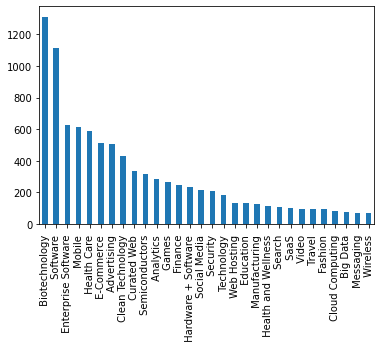

In [36]:
dft[' market '].value_counts().head(30).plot(kind='bar')

In [37]:
def tell_country(a): ## tells country related information of startups
    df_c=dft[dft['country_code']==a]
    plt.subplot(211)
    df_c['city'].value_counts().head(10).plot(kind='pie',figsize=(10,20),autopct='%1.1f%%')
    plt.subplot(212)
    df_c[' market '].value_counts().head(30).plot(kind='bar')

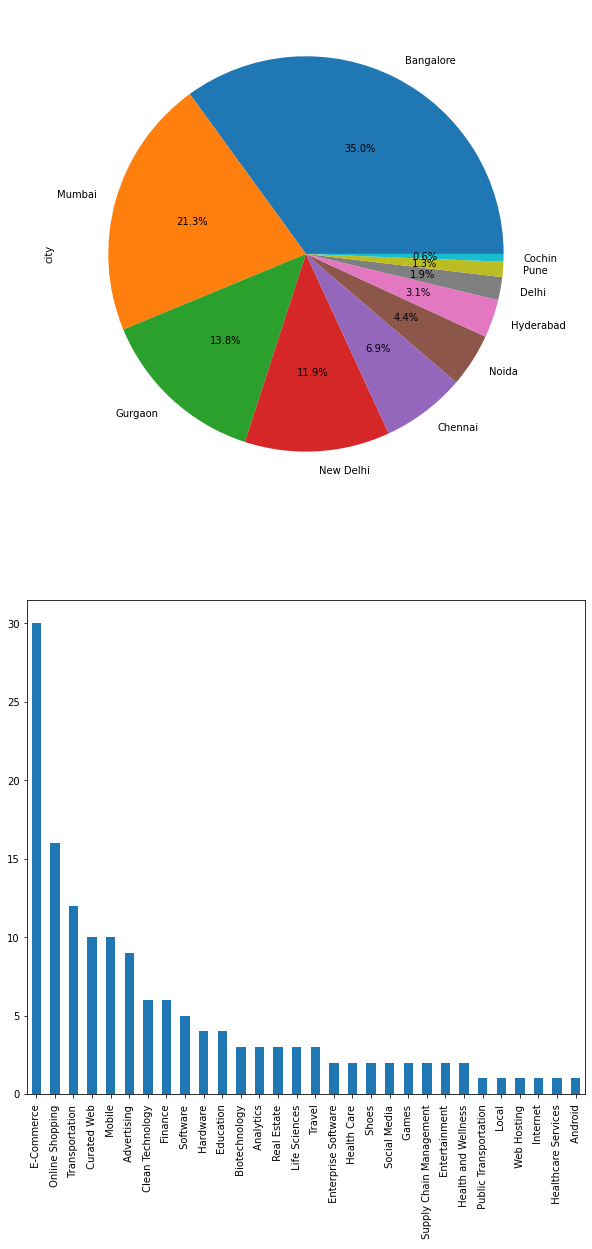

In [38]:
tell_country('IND')

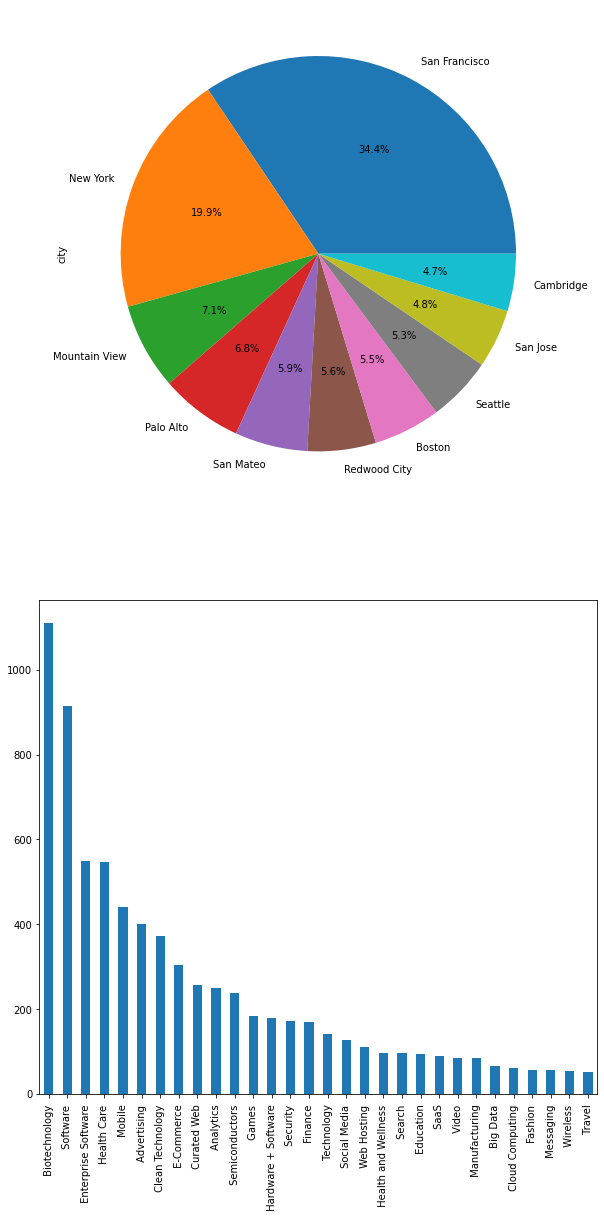

In [39]:
tell_country('USA')

In [40]:
x=dft[dft['homepage_url'].isnull()==False]

In [41]:
stri = []
for i in x['homepage_url']:
    stri.append(i)

In [42]:
l = len(stri)
i = 0
e = []
while i < l:
    y = stri[i].split('.')[len(stri[i].split('.'))-1]
    if ('/' in y == True):
        e.append(y.split('/')[0])
    else:
        e.append(y)
        
    i=i+1
    
x['domain']=e

In [43]:
x['domain'].replace(to_replace = r'^com[/w/.-]',value='com',regex= True,inplace=True)

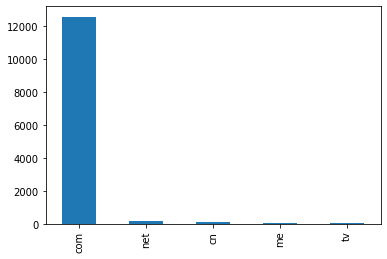

In [44]:
x['domain'].value_counts().head(5).plot(kind='bar')

## Most of the startups preffers .com domains

In [45]:
dft['founded_quarter'].replace(to_replace = r'^[\d\d\d\d.-]+',value='',regex= True,inplace = True)

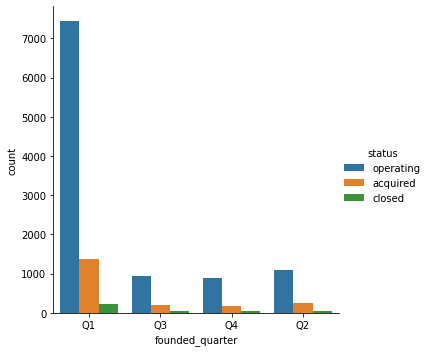

In [46]:
sns.catplot(x='founded_quarter',hue='status',kind='count', data=dft)

## first quarter is most important for startups